Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**Stable IIR Biquad Filter -> Coefficient's Value Range**,
Winter Semester 2020/21 (Master Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
from scipy import signal


def zplane_plot(ax, z, p, k):
    """Plot pole/zero/gain plot of discrete-time, linear-time-invariant system.

    Note that the for-loop handling might be not very efficient
    for very long FIRs

    z...array of zeros in z-plane
    p...array of poles in z-zplane
    k...gain factor

    taken from own work
    URL = ('https://github.com/spatialaudio/signals-and-systems-exercises/'
           'blob/master/sig_sys_tools.py')

    currently we don't use the ax input parameter, we rather just plot
    in hope for getting an appropriate place for it from the calling function
    """
    # draw unit circle
    Nf = 2**7
    Om = np.arange(Nf) * 2*np.pi/Nf
    plt.plot(np.cos(Om), np.sin(Om), 'C7')

    try:  # TBD: check if this pole is compensated by a zero
        circle = Circle((0, 0), radius=np.max(np.abs(p)),
                        color='C7', alpha=0.15)
        plt.gcf().gca().add_artist(circle)
    except ValueError:
        print('no pole at all, ROC is whole z-plane')

    zu, zc = np.unique(z, return_counts=True)  # find and count unique zeros
    for zui, zci in zip(zu, zc):  # plot them individually
        plt.plot(np.real(zui), np.imag(zui), ms=8,
                 color='C0', marker='o', fillstyle='none')
        if zci > 1:  # if multiple zeros exist then indicate the count
            plt.text(np.real(zui), np.imag(zui), zci)

    pu, pc = np.unique(p, return_counts=True)  # find and count unique poles
    for pui, pci in zip(pu, pc):  # plot them individually
        plt.plot(np.real(pui), np.imag(pui), ms=8,
                 color='C0', marker='x')
        if pci > 1:  # if multiple poles exist then indicate the count
            plt.text(np.real(pui), np.imag(pui), pci)

    plt.text(0, +1, 'k={0:f}'.format(k))
    plt.text(0, -1, 'ROC for causal: white')
    plt.axis('square')
    plt.xlabel(r'$\Re\{z\}$')
    plt.ylabel(r'$\Im\{z\}$')
    plt.grid(True, which="both", axis="both",
             linestyle="-", linewidth=0.5, color='C7')

## Biquad
A biquadratic or - abbreviated - **biquad** filter is a **recursive filter of second
order** that is commonly implemented in digital signal processing. The biquad
filter is expressed in most textbooks with $a_0=1$ as

\begin{equation}
H(z)=\frac{b_0z^0+b_1z^{-1}+b_2z^{-2}}{1\cdot z^0+a_1z^{-1}+a_2z^{-2}}
=\frac{b_0z^2+b_1z+b_2}{z^2+a_1z+a_2}.
\label{eq:biquad}
\end{equation}

- The notation in form of the **first fraction** in above equation is suitable for identifying the structure of the filter (the necessary delay elements for the input (numerator) and the output (denominator) can directly be seen) and for creating block diagrams (direct form I/II, transposed direct forms, ...) from the difference equation.
- The form of the **second fraction** is more convenient for calculating poles, zeros and gain of the filter.

## Poles of Biquad
The value range of the coefficients $a_{1,2}$ is important as they determine the
poles and therefore the stability of the filter. The poles of the biquad in general

\begin{equation}
z_{\infty,1,2}=\frac{-a_1}{2}\pm\frac{\sqrt{a_1^2-4a_2}}{2}.
\end{equation}

We must aim at $a_1,a_2\in\mathbb{R}$ since **only real coefficients** ensure that the system $H(z)$ produces **real valued output signals** from real valued input signals.
This can be achieved if the two poles are **either real or complex conjugates**.
Furthermore, we aim at a **stable** system, which requires that both poles are **within the unit circle**.

## Real Poles

For **real poles** (i.e. poles on the real-axis in the z-plane), the expression under the square root has to be positive

\begin{equation}
z_{\infty,1,2}=\frac{-a_1}{2}\pm\frac{1}{2}\sqrt{\underbrace{a_1^2-4a_2}_{\geq0}}
\end{equation}

and the **two conditions**

\begin{align}
a_1\leq-2\sqrt{a_2} \vee a_1\geq2\sqrt{a_2}\\
a_2>|a_1|-1
\end{align}

must hold (try to figure out these conditions by yourself) to achieve stable IIR system with real valued coefficients $a_{1,2}$.

## Complex Conjugate Poles

For the case of **complex conjugate poles**, one can write

\begin{equation}
z_{\infty,1,2}=\frac{-a_1}{2}\pm\frac{\mathrm{j}}{2}\sqrt{\underbrace{4a_2-a_1^2}_{>0}}.
\label{eq:complexconjugatepoles}
\end{equation}

which holds if the two conditions 

\begin{align}
-2\sqrt{a_2}<a_1<2\sqrt{a_2}\\
0\leq a_2<1
\end{align}

are met (try to figure out these conditions by yourself).

The figure below visualizes the range of values of the coefficients $a_1,a_2$ as being inside the blue/orange contour for a pair of real poles (blue) and a pair of complex conjugate poles (orange).

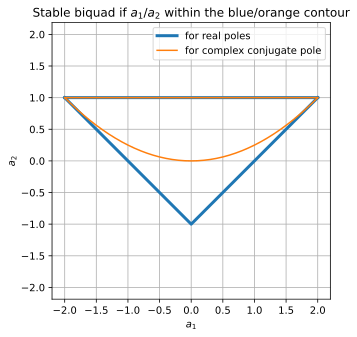

In [2]:
# real pole
a1r = np.arange(-2,2.1,0.1)
a2r = np.abs(a1r)-1
# complex conjugate 
a1cc = np.arange(-2,2.1,0.1)
a2cc = a1cc**2/4

plt.figure(figsize=(5,5))
plt.plot(a1r, a2r,'C0', lw=3, label='for real poles')
plt.plot([-2,2], [1,1], 'C0', lw=3)
plt.plot(a1cc, a2cc,'C1', label='for complex conjugate pole')
plt.plot([-2,2], [1,1], 'C1')
plt.axis('equal')
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.title(r'Stable biquad if $a_1$/$a_2$ within the blue/orange contour')
plt.legend()
plt.grid(True)

True
True


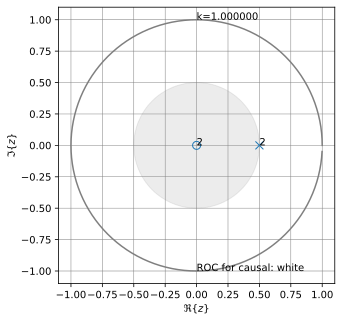

In [3]:
# check for two real poles
b = (1, 0, 0)
a = (1, -1, 0.25)
z, p, k = signal.tf2zpk(b, a)
ax = plt.figure(figsize=(5, 5))
zplane_plot(ax, z, p, k)

# conditions
print(a[1] <= -2*np.sqrt(a[2]) or a[1] >= +2*np.sqrt(a[2]))
print(a[2] > np.abs(a[1])-1)

True
True


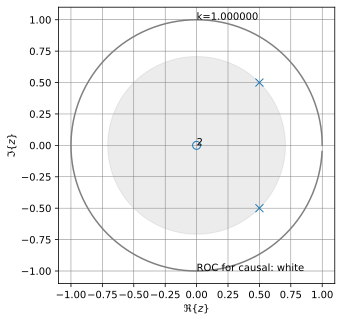

In [4]:
# check for complex conjugate pole
b = (1, 0, 0)
a = (1, -1, 0.5)
z, p, k = signal.tf2zpk(b, a)
ax = plt.figure(figsize=(5, 5))
zplane_plot(ax, z, p, k)

print(-2*np.sqrt(a[2]) < a[1] < +2*np.sqrt(a[2]))
print(0 <= a[2] < 1)

# **Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises